# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [344]:
import requests
import pandas as pd

In [345]:
df=pd.read_csv("twitter-archive-enhanced.csv")
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
873,761334018830917632,NaN,NaN,2016-08-04 22:52:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruce. I really want to hear the joke ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761334018...,10,10,Bruce,None,None,None,None
2200,668655139528511488,NaN,NaN,2015-11-23 04:59:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Winifred. He is a Papyrus Hydrang...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668655139...,11,10,Winifred,None,None,None,None
658,791672322847637504,NaN,NaN,2016-10-27 16:06:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When she says you're a good boy and you know y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/791672322...,13,10,None,None,None,None,None
2035,671735591348891648,NaN,NaN,2015-12-01 17:00:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar. He's ready for Christmas. 11/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671735591...,11,10,Oscar,None,None,None,None
1427,697630435728322560,NaN,NaN,2016-02-11 03:57:11 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Pls make sure ur dogs have gone through some b...,NaN,NaN,NaN,https://vine.co/v/in7ZzHPKzWz,8,10,None,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [346]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

df1= pd.read_csv('image-predictions.tsv', sep='\t')
df1.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [444]:
import tweepy as tw

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tw.API(auth)

In [ ]:
with open("tweet-json.txt", "w", encoding="utf-8") as json_file:
    for tweet_id in json_file:
        try:
            tweets = api.get_status(tweet_id, tweet_mode="extended")
            json.dump(data._json, json_file)
            json_file.write("\n")
        except:
                continue

##### Extracting tweets for the tweet.json file

In [451]:
import json
df_list=[]
with open(r"C:\Users\HP\Documents\ALX UDACITY\tweet-json", 'r') as json_file:
    for tweet_id in json_file:
        tweet= json.loads(tweet_id)
        
        tweet_id = tweet["id"]
        retweet_count=tweet['retweet_count']
        fav_count= tweet['favorite_count']
        
        df_list.append({'tweet_id' : tweet_id,
                       'retweet_count' : retweet_count, 'favorite_count': fav_count})
        
df2= pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
df2.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data



In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [350]:
df.in_reply_to_status_id.value_counts()

6.671522e+17    2
6.715449e+17    1
7.030419e+17    1
6.747400e+17    1
8.116272e+17    1
               ..
7.384119e+17    1
7.638652e+17    1
7.476487e+17    1
6.758457e+17    1
6.706684e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64

In [351]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [352]:
df1['p1']

0       Welsh_springer_spaniel
1                      redbone
2              German_shepherd
3          Rhodesian_ridgeback
4           miniature_pinscher
                 ...          
2070                    basset
2071               paper_towel
2072                 Chihuahua
2073                 Chihuahua
2074                    orange
Name: p1, Length: 2075, dtype: object

In [353]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        0 non-null      object
 1   retweet_count   0 non-null      object
 2   favorite_count  0 non-null      object
dtypes: object(3)
memory usage: 0.0+ bytes


In [354]:
#checking for null values
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [355]:
#sum of duplicated values
df.duplicated().sum()

0

In [356]:
sum(df1.duplicated())

0

In [357]:
sum(df2.duplicated())

0

In [358]:
#checking for the correlation between retweeted id ans tweet id
df['retweeted_status_id'].corr(df['tweet_id'])

0.7447327757087534

In [359]:
#unique names from the name column
df['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [360]:
df['name'].duplicated().sum()

1399

In [361]:
df.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
           ... 
Zoe           1
Bradley       1
Horace        1
Tedrick       1
Kingsley      1
Name: name, Length: 957, dtype: int64

### Quality issues
1. Twitter enhanced archive has multiple missing entries.

2. Removing retweets rows 

3. name column has 745 none entries and 55 entries for a,some other characters were used to represent the name of dogs. 

4. timestamp and retweet_status_timestamp are in wrong data formats

5. The ID fields, like tweet_id, in_reply_to_status_id, should be objects, not integers or floats 

6. The source column has links attached to the tweet source, hence needs to be extracted

7. Empty strings should be replaced with null values.

8. It includes tweets with no retwets.

### Tidiness issues
1. The three dataframes should be merged on tweet_id

2.  The dog stages could be merged as one column

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [455]:
# Make copies of original pieces of data
twitter_enhanced=df.copy()
images=df1.copy()
tweets=df2.copy()

In [442]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #1: Dropping Irrelevant columns
Changing the Data type of in_reply_to_status_id, in_reply_to_user_id 

### Code

In [363]:
twitter_enhanced["in_reply_to_status_id"]= twitter_enhanced["in_reply_to_status_id"].astype(str)
 

In [364]:
twitter_enhanced["in_reply_to_user_id"]= twitter_enhanced["in_reply_to_user_id"].astype(str)


### Test

In [365]:
twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       2356 non-null   object 
 2   in_reply_to_user_id         2356 non-null   object 
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Issue #2: Dropping Irrelevant columns

#### Define

Drop the irrelevant columns using pandas method .drop

#### Code

In [366]:
#Removing retweets rows
twitter_enhanced = twitter_enhanced[twitter_enhanced.retweeted_status_id.isnull()]
twitter_enhanced = twitter_enhanced[twitter_enhanced.retweeted_status_user_id.isnull()]
twitter_enhanced = twitter_enhanced[twitter_enhanced.retweeted_status_timestamp.isnull()]

In [367]:
#Dropping the columns 
twitter_enhanced= twitter_enhanced.drop('retweeted_status_id', axis=1)

In [368]:
twitter_enhanced.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)

In [369]:
twitter_enhanced.isnull().sum()

tweet_id               0
timestamp              0
source                 0
text                   0
expanded_urls         58
rating_numerator       0
rating_denominator     0
name                   0
doggo                  0
floofer                0
pupper                 0
puppo                  0
dtype: int64

#### Test

In [370]:
list(twitter_enhanced)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Issue #2: convert timestamp from float data type to datetime

In [371]:
twitter_enhanced['timestamp'].head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

#### Code:

In [372]:
twitter_enhanced['timestamp']=pd.to_datetime(twitter_enhanced['timestamp'])

#### Test:

In [373]:
twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [374]:
#extracting Month from timestamp
twitter_enhanced['Month']= (twitter_enhanced['timestamp']).dt.month_name()
twitter_enhanced['Month']

0         August
1         August
2           July
3           July
4           July
          ...   
2351    November
2352    November
2353    November
2354    November
2355    November
Name: Month, Length: 2175, dtype: object

In [375]:
#extracting Year from timestamp
twitter_enhanced['Year']= (twitter_enhanced['timestamp']).dt.year
twitter_enhanced['Year']

0       2017
1       2017
2       2017
3       2017
4       2017
        ... 
2351    2015
2352    2015
2353    2015
2354    2015
2355    2015
Name: Year, Length: 2175, dtype: int64

In [376]:
#drop the timestamp column

In [377]:
twitter_enhanced.drop('timestamp', axis=1,inplace=True)

In [378]:
twitter_enhanced.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Month,Year
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,August,2017
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,August,2017
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,July,2017
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,July,2017
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,July,2017


In [379]:
#import numpy as np

### Issue #4: Replace None values in stages

In [380]:
twitter_enhanced['floofer'].unique()

array(['None', 'floofer'], dtype=object)

In [381]:
#defining a function to replace none values in stages

import numpy as np

def dog_stages(value):
    invalid = ("None")
    if value == invalid:
        return ' '
    else:
        return value

In [382]:
twitter_enhanced.doggo.replace('None','', inplace = True)
twitter_enhanced.floofer.replace('None','', inplace = True)
twitter_enhanced.pupper.replace('None','', inplace = True)
twitter_enhanced.puppo.replace('None','', inplace = True)

In [383]:
twitter_enhanced.pupper.unique()

array(['', 'pupper'], dtype=object)

### Issue #5: Combine dog_stages into  a column.

#### Define: Combine the the stages of dog

In [384]:
twitter_enhanced['dog_stages']=twitter_enhanced.doggo + twitter_enhanced.floofer + twitter_enhanced.pupper +twitter_enhanced.puppo

#### Code: 

In [385]:
twitter_enhanced['dog_stages'].value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stages, dtype: int64

#### Test:

In [386]:
twitter_enhanced['dog_stages'].sample(12)

2209          
1597          
1759          
1395    pupper
50            
799           
311           
2284          
2221          
1143    pupper
2322          
2263          
Name: dog_stages, dtype: object

In [387]:
twitter_enhanced.loc[twitter_enhanced.dog_stages == "doggopupper", "dog_stages"]= 'doggo, pupper' 

In [388]:
twitter_enhanced.loc[twitter_enhanced['dog_stages']== "doggo, pupper"]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Month,Year,dog_stages
460,817777686764523521,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,,pupper,,January,2017,"doggo, pupper"
531,808106460588765185,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,,pupper,,December,2016,"doggo, pupper"
565,802265048156610565,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,,pupper,,November,2016,"doggo, pupper"
575,801115127852503040,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,,pupper,,November,2016,"doggo, pupper"
705,785639753186217984,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,,pupper,,October,2016,"doggo, pupper"
733,781308096455073793,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,,pupper,,September,2016,"doggo, pupper"
889,759793422261743616,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,,pupper,,July,2016,"doggo, pupper"
956,751583847268179968,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,,pupper,,July,2016,"doggo, pupper"
1063,741067306818797568,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,,pupper,,June,2016,"doggo, pupper"
1113,733109485275860992,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,,pupper,,May,2016,"doggo, pupper"


In [389]:
twitter_enhanced.loc[twitter_enhanced['dog_stages'] == "doggofloofer", "dog_stages"]= 'doggo, floofer' 

In [390]:
twitter_enhanced.loc[twitter_enhanced['dog_stages']== "doggo, floofer"]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Month,Year,dog_stages
200,854010172552949760,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,,,April,2017,"doggo, floofer"


In [391]:
twitter_enhanced.loc[twitter_enhanced['dog_stages'] == "doggopuppo", "dog_stages"]= 'doggo, puppo' 

In [392]:
twitter_enhanced['dog_stages'].value_counts()

                  1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stages, dtype: int64

In [393]:
twitter_enhanced['dog_stages'].tail(12)

2344    
2345    
2346    
2347    
2348    
2349    
2350    
2351    
2352    
2353    
2354    
2355    
Name: dog_stages, dtype: object

In [394]:
#drop the individual dog stages 

In [395]:
twitter_enhanced.drop(['doggo', 'floofer', 'puppo', 'pupper'], axis=1, inplace=True)

In [396]:
#checking if the stages dropped
list(twitter_enhanced)

['tweet_id',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'Month',
 'Year',
 'dog_stages']

#### Code

### Issue #6: Extract the tweet source in between braces

#### Define: Clean the tweet source colum by extracting the words in between ">" and "<"

In [397]:
twitter_enhanced['source']

0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
                              ...                        
2351    <a href="http://twitter.com/download/iphone" r...
2352    <a href="http://twitter.com/download/iphone" r...
2353    <a href="http://twitter.com/download/iphone" r...
2354    <a href="http://twitter.com/download/iphone" r...
2355    <a href="http://twitter.com/download/iphone" r...
Name: source, Length: 2175, dtype: object

In [398]:
#extracting the source in between closing brace> and opening brace <
twitter_enhanced['source']=twitter_enhanced['source'].str.extract('>([\w\W\s]*)<', expand=True)

In [399]:
twitter_enhanced['source']

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2351    Twitter for iPhone
2352    Twitter for iPhone
2353    Twitter for iPhone
2354    Twitter for iPhone
2355    Twitter for iPhone
Name: source, Length: 2175, dtype: object

In [400]:
twitter_enhanced['source'].value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

 ### Issue #7  :   Detecting wrong names in dog names

In [401]:
twitter_enhanced.name.head()

0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
Name: name, dtype: object

### Code

In [402]:
Dog_Names = list(twitter_enhanced.name)
adjectives = [l for l in Dog_Names if l.islower()]
print (adjectives)

['such', 'a', 'quite', 'quite', 'not', 'one', 'incredibly', 'a', 'a', 'very', 'my', 'one', 'not', 'his', 'one', 'a', 'a', 'a', 'an', 'very', 'actually', 'a', 'just', 'getting', 'mad', 'very', 'this', 'unacceptable', 'all', 'a', 'old', 'a', 'infuriating', 'a', 'a', 'a', 'an', 'a', 'a', 'very', 'getting', 'just', 'a', 'the', 'the', 'actually', 'by', 'a', 'officially', 'a', 'the', 'the', 'a', 'a', 'a', 'a', 'life', 'a', 'one', 'a', 'a', 'a', 'light', 'just', 'space', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'quite', 'a', 'an', 'a', 'an', 'the', 'the', 'a', 'a', 'an', 'a', 'a', 'a', 'a']


In [403]:
invalid_names=pd.DataFrame(adjectives)


In [404]:
invalid_names.duplicated().sum()

79

In [405]:
import numpy as np
def replace_name(value):
    wrong_name = (adjectives)
    if value in wrong_name:
        return np.nan
    else:
        return value

twitter_enhanced['name'] = twitter_enhanced['name'].apply(lambda x:replace_name(x))

#### Test:

In [406]:
twitter_enhanced.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352         NaN
2353         NaN
2354         NaN
2355        None
Name: name, Length: 2175, dtype: object

In [407]:
invalid_names

,0
0,such
1,a
2,quite
3,quite
4,not
...,...
99,an
100,a
101,a
102,a


In [408]:
twitter_enhanced.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352         NaN
2353         NaN
2354         NaN
2355        None
Name: name, Length: 2175, dtype: object

In [409]:
twitter_enhanced['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', nan, 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'H

In [410]:
twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   source              2175 non-null   object
 2   text                2175 non-null   object
 3   expanded_urls       2117 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2071 non-null   object
 7   Month               2175 non-null   object
 8   Year                2175 non-null   int64 
 9   dog_stages          2175 non-null   object
dtypes: int64(4), object(6)
memory usage: 186.9+ KB


In [411]:
twitter_enhanced['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', nan, 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'H

In [413]:
twitter_enhanced1 =twitter_enhanced.copy()

### Issue #8 Replacing the _ in p1,p2,p3 columns with space

#### Code

In [414]:
# replacing the _ in p1,p2,p3 columns with space
images['p1']=images.p1.str.replace('_',' ')

In [415]:
images['p2']=images.p2.str.replace('_',' ')
images['p3']=images.p3.str.replace('_',' ')


#### Test:

In [416]:
images['p1'].head(10)

0    Welsh springer spaniel
1                   redbone
2           German shepherd
3       Rhodesian ridgeback
4        miniature pinscher
5      Bernese mountain dog
6                box turtle
7                      chow
8             shopping cart
9          miniature poodle
Name: p1, dtype: object

In [417]:
import numpy as np
#twitter_enhanced.loc[twitter_enhanced['name']== "None"].replace('None', np.nan, inplace = True) 
twitter_enhanced['name'].replace(to_replace=["None"], value=np.nan, inplace=True)

In [418]:
sum(twitter_enhanced['name'].isnull())

784

In [419]:
twitter_enhanced['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


### Issue #9: Dropping null values in dog_stages
Define: Drop the null values in dog stages.

In [420]:
twitter_enhanced['dog_stages'].value_counts()

                  1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stages, dtype: int64

In [421]:
#drop all null values
twitter_enhanced.dropna(inplace=True)


In [422]:
#checking if the null values have been dropped
twitter_enhanced.isnull().sum().any()

False

In [423]:
twitter_enhanced.isnull().sum()

tweet_id              0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
Month                 0
Year                  0
dog_stages            0
dtype: int64

In [424]:
#replace the empty values in dog stages with nan

In [425]:
twitter_enhanced.dog_stages= twitter_enhanced.dog_stages.replace('', np.nan)


In [426]:
twitter_enhanced.dog_stages.value_counts()

pupper           121
doggo             38
puppo             16
floofer            5
doggo, pupper      4
Name: dog_stages, dtype: int64

In [427]:
twitter_enhanced.isnull().sum()

tweet_id                 0
source                   0
text                     0
expanded_urls            0
rating_numerator         0
rating_denominator       0
name                     0
Month                    0
Year                     0
dog_stages            1207
dtype: int64

In [428]:
twitter_enhanced.dropna(inplace=True)

In [429]:
clean_twitter_archive= twitter_enhanced

In [452]:
clean_twitter_archive.isnull().sum()

tweet_id              0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
Month                 0
Year                  0
dog_stages            0
dtype: int64

In [431]:
clean_twitter_archive['dog_stages'].sample(10)

663      puppo
1845    pupper
1921    pupper
483     pupper
1981    pupper
345      doggo
389      doggo
1658    pupper
1977    pupper
1915    pupper
Name: dog_stages, dtype: object

In [432]:
clean_twitter_archive.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,Month,Year,dog_stages
9,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,July,2017,doggo
14,889531135344209921,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,July,2017,puppo
29,886366144734445568,Twitter for iPhone,This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,July,2017,pupper
43,884162670584377345,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,July,2017,doggo
46,883360690899218434,Twitter for iPhone,Meet Grizzwald. He may be the floofiest floofe...,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,July,2017,floofer


In [456]:
tweets['retweet_count'].max()

79515

In [457]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [458]:
tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Merging all three data based on their common feature

### Define

Tweet_id is common amongst the three, if merged using pandas method .merge would provide additional insights to the data 

#### Code

In [459]:
twitter_archive_master=clean_twitter_archive.merge(tweets, on="tweet_id")
twitter_archive_master=twitter_archive_master.merge(images, on='tweet_id')

In [460]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            177 non-null    int64  
 1   source              177 non-null    object 
 2   text                177 non-null    object 
 3   expanded_urls       177 non-null    object 
 4   rating_numerator    177 non-null    int64  
 5   rating_denominator  177 non-null    int64  
 6   name                177 non-null    object 
 7   Month               177 non-null    object 
 8   Year                177 non-null    int64  
 9   dog_stages          177 non-null    object 
 10  retweet_count       177 non-null    int64  
 11  favorite_count      177 non-null    int64  
 12  jpg_url             177 non-null    object 
 13  img_num             177 non-null    int64  
 14  p1                  177 non-null    object 
 15  p1_conf             177 non-null    float64
 16  p1_dog  

#### Test

In [461]:
twitter_archive_master.sample()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,Month,Year,dog_stages,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
16,850019790995546112,Twitter for iPhone,Say hello to Boomer. He's a sandy pupper. Havi...,https://twitter.com/dog_rates/status/850019790...,12,10,Boomer,April,2017,pupper,...,3,Shetland_sheepdog,0.759907,True,collie,0.107405,True,Pembroke,0.052335,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [462]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [463]:
import seaborn as sns

### Insights:
1. The original twitter archive dataset had multiple null values in the dog_stages and names columns, hence they were dropped

2. There were more tweets on puppo dog_stage

3. There were more retweet counts in the year 2017, could be more awareness of people on dogs or owning dog(s)

4. From the images detected, there seems to more dogs classified as Golden retriever.

5. From the tweets provided, most of the twitter account users were Iphone twiiter users.


### Visualization

<AxesSubplot:xlabel='0'>

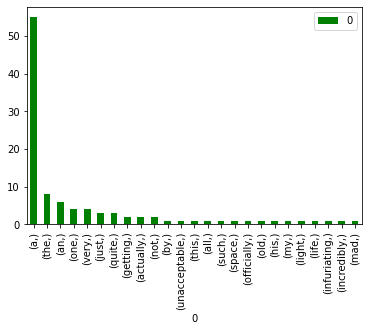

In [464]:
invalid_names.value_counts().to_frame().plot(kind='bar', color="green")

<AxesSubplot:>

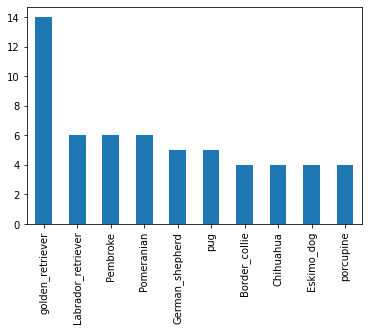

In [465]:
twitter_archive_master['p1'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:>

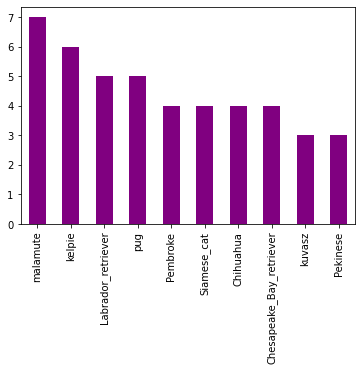

In [466]:
twitter_archive_master['p3'].value_counts().head(10).plot(kind='bar', color='purple')

<AxesSubplot:>

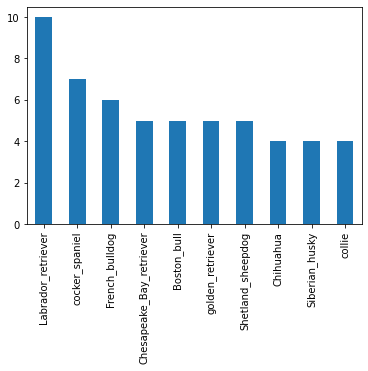

In [467]:
twitter_archive_master['p2'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:title={'center':'Dog Stages'}>

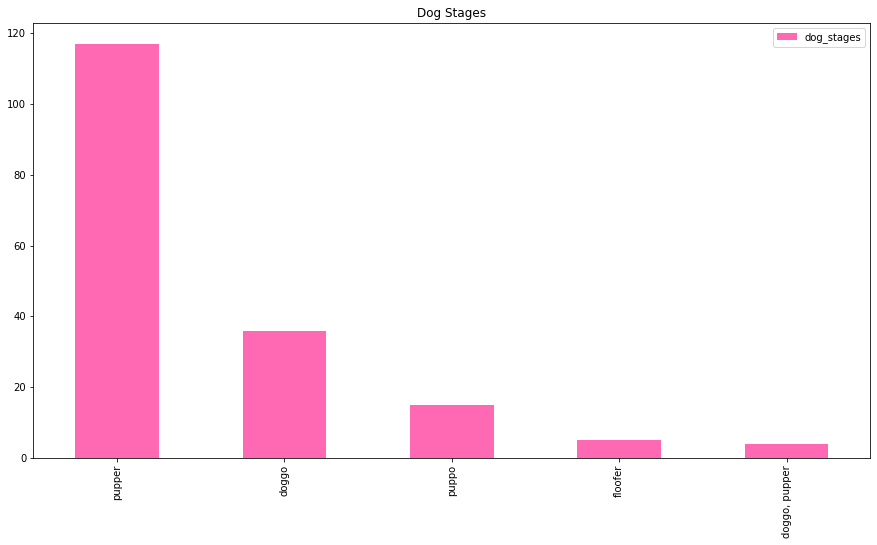

In [468]:
twitter_archive_master['dog_stages'].value_counts().to_frame().plot(kind='bar', color= "hotpink", figsize=(15,8), title="Dog Stages")

In [469]:
import matplotlib.pyplot as plt

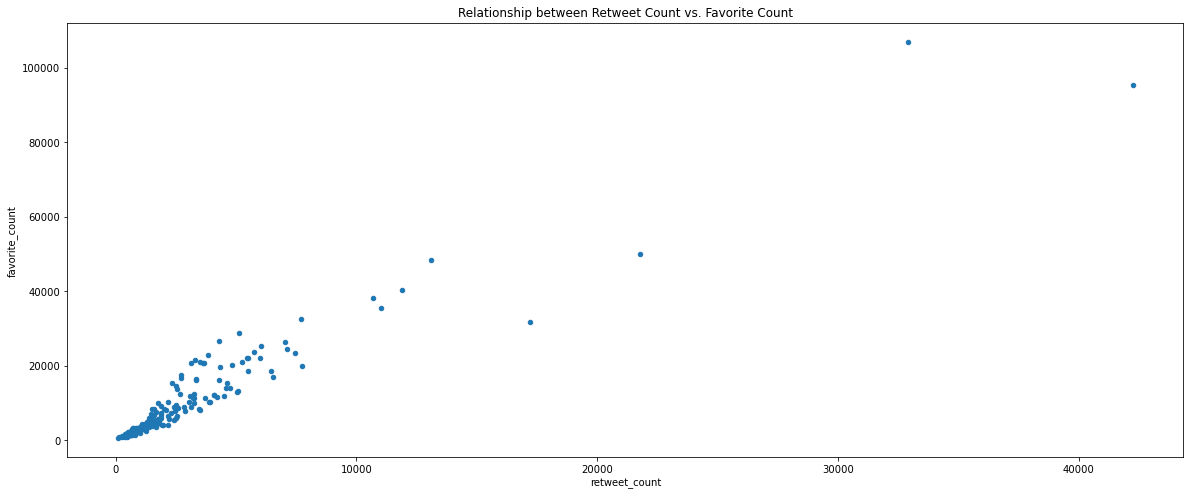

In [470]:
twitter_archive_master.plot(kind = 'scatter', x = 'retweet_count', y = 'favorite_count', title="Relationship between Retweet Count vs. Favorite Count", figsize=(20,8))

plt.show()

The plot above, shows there is a positive correlation between retweet count and favorite count, when a tweet is retweeted, it receives more likes from people.

<AxesSubplot:title={'center':'Most Favored Dog'}, xlabel='dog_stages'>

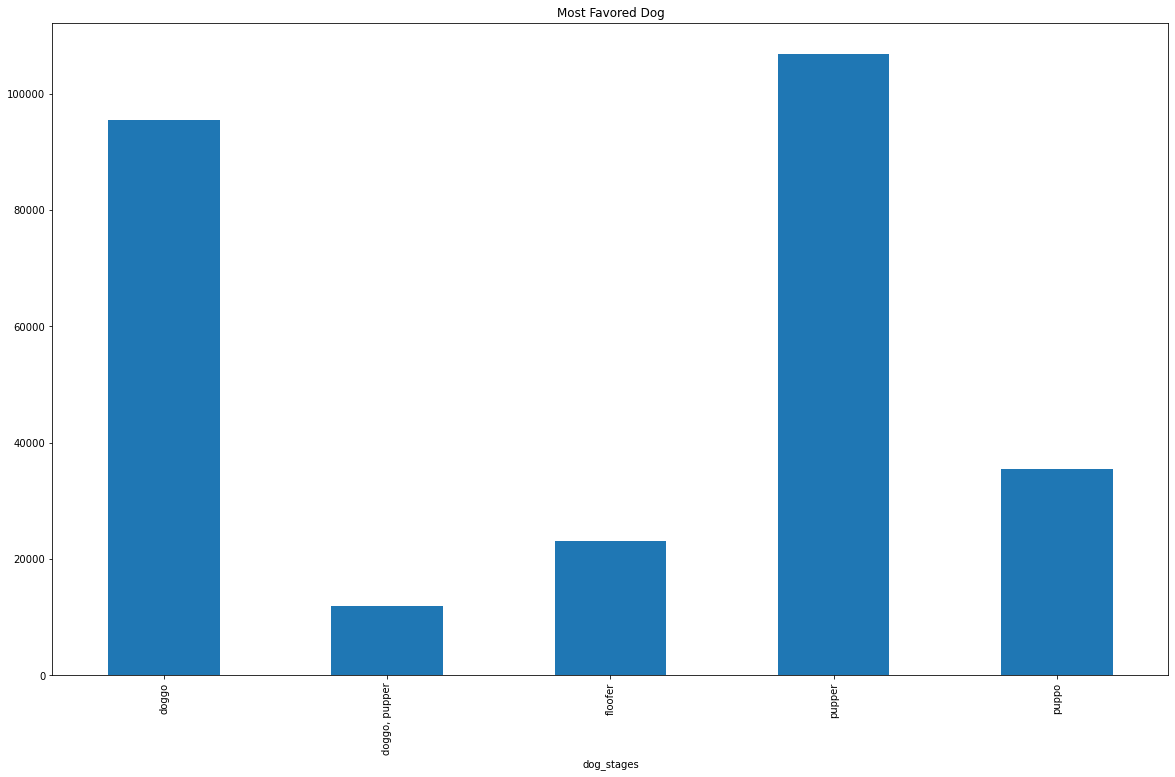

In [471]:
Top_Favorite_Dogs= twitter_archive_master.groupby('dog_stages').favorite_count.max(20).plot(kind="bar", figsize=(20,12), title="Most Favored Dog")
Top_Favorite_Dogs

From the above visual, it can be seen that tweets about dog stages; Pupper were more favored followed by Doggo

twitter_archive_master['source'].value_counts().plot(kind='pie', title="Tweet Source")

<ipython-input-472-9a27dd4696c8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Yearly_retweet_count= twitter_archive_master.groupby('Year')['retweet_count', 'favorite_count'].sum().plot(kind="bar", figsize=(20,12), title="Yearly Retweet Count")


<AxesSubplot:title={'center':'Yearly Retweet Count'}, xlabel='Year'>

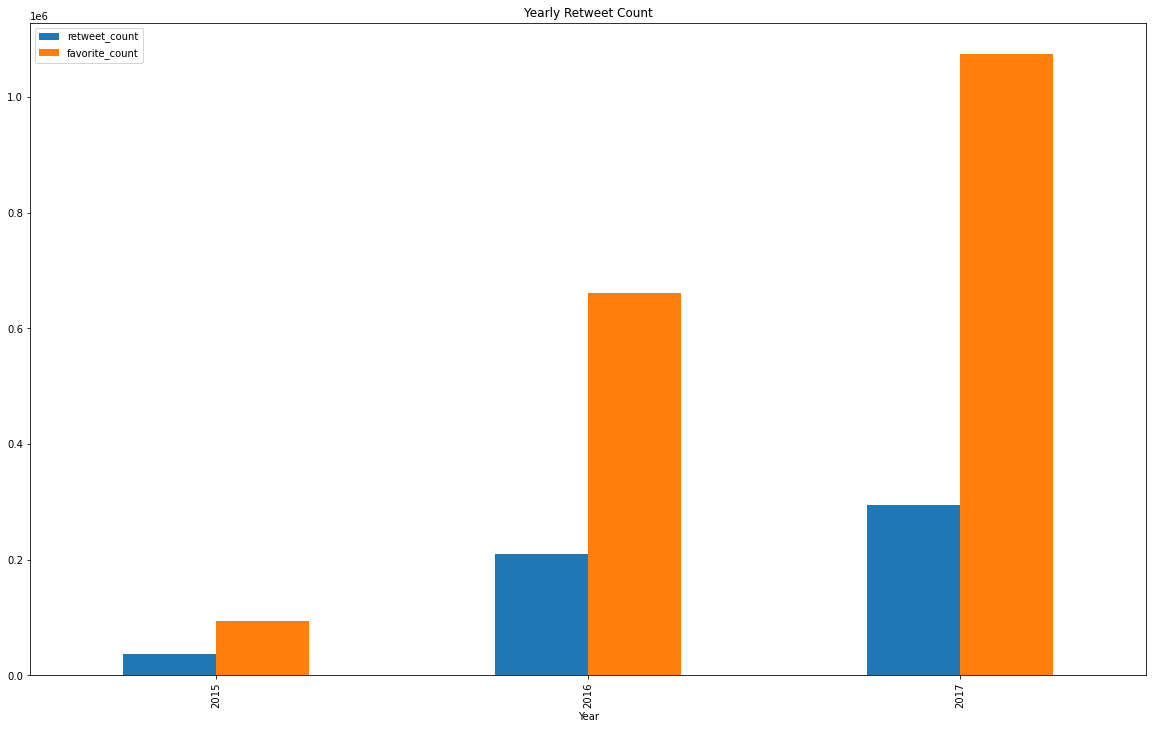

In [472]:
Yearly_retweet_count= twitter_archive_master.groupby('Year')['retweet_count', 'favorite_count'].sum().plot(kind="bar", figsize=(20,12), title="Yearly Retweet Count")
Yearly_retweet_count